In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from pprint import pprint
import json
from selenium_stealth import stealth


In [11]:
usernames = ['gessicakayane', 'andressasuita', 'taina', 'cocielo']

proxy = "server:port"

output = {}

def prepare_browser():
    chrome_options = webdriver.ChromeOptions()

    chrome_options.add_argument(f'--proxy-server={proxy}')

    chrome_options.add_argument("start-maximized")
    chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
    chrome_options.add_experimental_option('useAutomationExtension', False)

    driver = webdriver.Chrome(options= chrome_options)

    stealth(driver,
        user_agent= 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36',
        languages= ["en-US", "en"],
        vendor=  "Google Inc.",
        platform=  "Win32",
        webgl_vendor=  "Intel Inc.",
        renderer=  "Intel Iris OpenGL Engine",
        fix_hairline= False,
        run_on_insecure_origins= False,
        )

    return driver

def scrape(username):

    url = f'https://instagram.com/{username}'

    chrome = prepare_browser()

    chrome.get(url)

    print (f"Attempting: {chrome.current_url}")
    if "login" in chrome.current_url:
        print ("Failed/ redir to login")
        chrome.quit()

    else:
        print ("Success")
        resp_body = chrome.find_element(By.TAG_NAME, "body").text
        data_json = json.loads(resp_body)
        user_data = data_json['graphql']['user']
        parse_data(username, user_data)
        chrome.quit()

def main():
    for username in usernames:
        scrape(username)

if __name__ == '__main__':
    main()
    pprint(output)


def parse_data(username, user_data):

    captions = []
    if len(user_data['edge_owner_to_timeline_media']['edges']) > 0:
        for node in user_data['edge_owner_to_timeline_media']['edges']:
            if len(node['node']['edge_media_to_caption']['edges']) > 0:
                if node['node']['edge_media_to_caption']['edges'][0]['node']['text']:
                    captions.append(
                        node['node']['edge_media_to_caption']['edges'][0]['node']['text']
                    )

    output[username] = {
        'name': user_data['full_name'],
        'category': user_data['category_name'],
        'followers': user_data['edge_followed_by']['count'],
        'posts': captions,
    }

Attempting: https://instagram.com/gessicakayane
Success


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [15]:
import time
time.sleep(5)
from bs4 import BeautifulSoup
import requests

In [16]:
url = "https://www.instagram.com/andressasuita/"

user_agent = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}

response = requests.get(url, headers=user_agent)
response.status_code


200

<!DOCTYPE html>
<html class="_9dls" dir="ltr" lang="en" style="background-color: rgb(var(--ig-secondary-background))"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" href="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" rel="icon" sizes="192x192"/><meta charset="utf-8"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="yes" name="mobile-web-app-capable"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/><meta content="#ffffff" name="theme-color"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" rel="apple-touch-icon" sizes="120x120"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yx/r/H1l_HHqi4p6.png" rel="apple-touch-icon" sizes="152x152"/><link hr
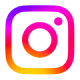
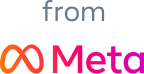

In [17]:
soup = BeautifulSoup(response.content)
soup